<ipython-input-1-05504a216be2>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1-05504a216be2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1-05504a216be2>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1-05504a216be2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

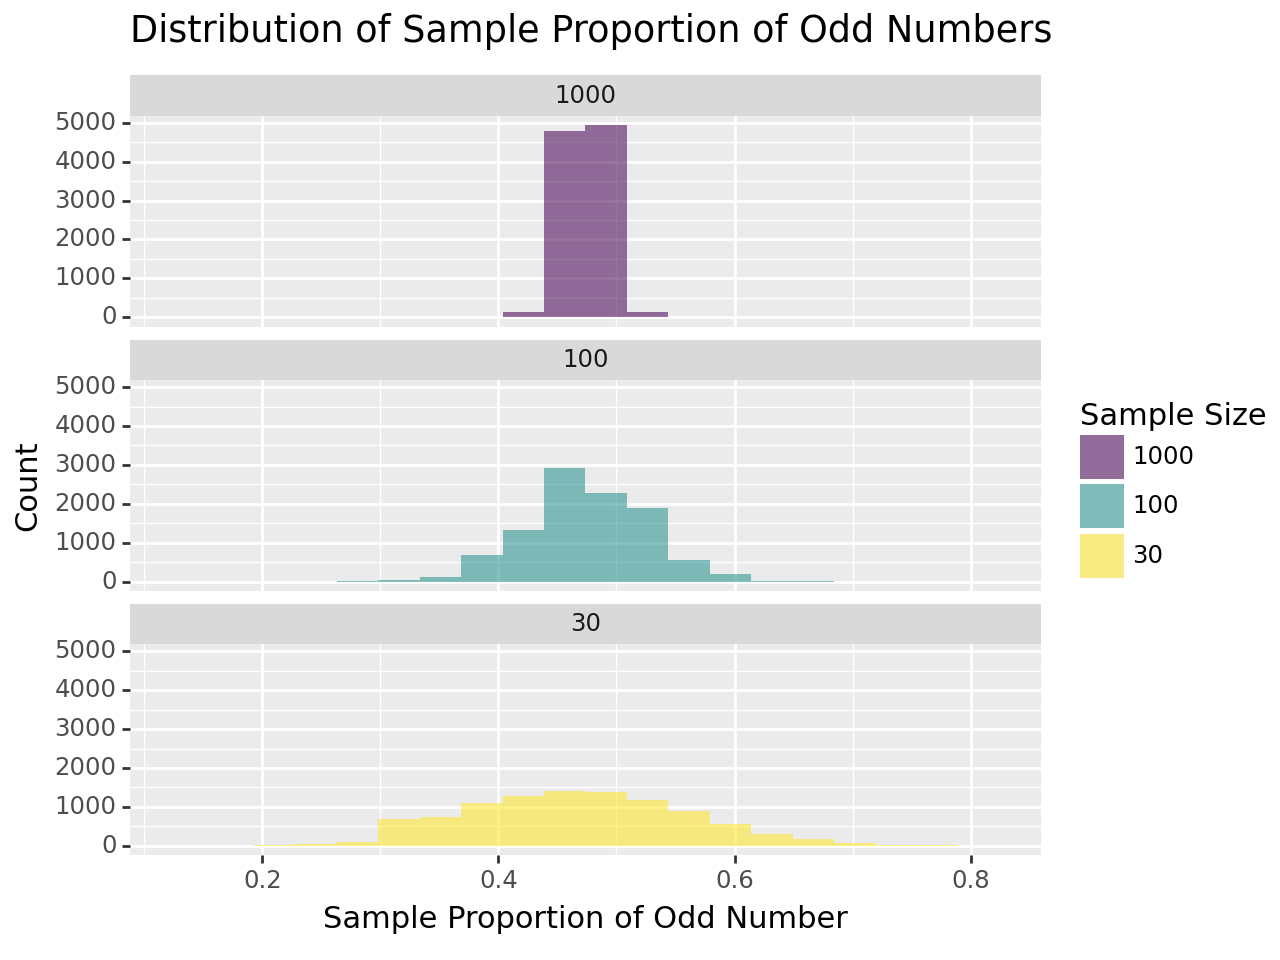

<Figure Size: (640 x 480)>

In [1]:
#### Simulate Samples ####
# Roulette Wheel

# Importing necessary libraries
import pandas as pd
import random
import numpy as np
from plotnine import ggplot, aes, geom_histogram, facet_wrap, ylab, xlab, ggtitle, labs

# Create data frame to hold simulations
ns = [30, 100, 1000] # Numbers of Flips
sim_n = 10000
probs = [18/38, 20/38]
d = pd.DataFrame({
  'sample_size30' : [0]*sim_n,
  'sample_size100' : [0]*sim_n,
  'sample_size1000' : [0]*sim_n,
})

# Perform simulations
k = 0
for i in np.arange(sim_n):
    x = random.choices(["Odd", "Not Odd"], k = ns[0], weights = probs)
    x2 = random.choices(["Odd", "Not Odd"], k = ns[1], weights = probs)
    x3 = random.choices(["Odd", "Not Odd"], k = ns[2], weights = probs)

    d['sample_size30'][k] = sum(np.char.equal(x, "Odd"))/ns[0]
    d['sample_size100'][k] = sum(np.char.equal(x2, "Odd"))/ns[1]
    d['sample_size1000'][k] = sum(np.char.equal(x3, "Odd"))/ns[2]
    k = k + 1

# Organize results
d2 = d.melt(value_vars = ['sample_size30', 'sample_size100', 'sample_size1000'], var_name = 'sample_size', value_name = 'prop')
d2['n'] = ''
d2['n'][d2['sample_size'] == "sample_size30"] = "30"
d2['n'][d2['sample_size'] == "sample_size100"] = "100"
d2['n'][d2['sample_size'] == "sample_size1000"] = "1000"

d2['n'] = d2['n'].astype("category").cat.reorder_categories(["1000", "100", "30"], ordered = True)

# Plot results
(ggplot(d2, aes(x = 'prop', fill = 'n')) +
  geom_histogram(alpha = .55, bins = 20) +
  facet_wrap('n', nrow = 3) +
  xlab("Sample Proportion of Odd Number") +
  ylab("Count") +
  labs(fill = "Sample Size") +
  ggtitle("Distribution of Sample Proportion of Odd Numbers")
)